# Clasificación

En los problemas de **clasificación,** el espacio de salida es un conjunto de $C$ etiquetas mútuamente exclusivas y desordenadas que llamamos **clases,** $\mathcal{Y}=\{1,2,\dotsc,C\}$. La predicción de la etiqueta de clase de una entrada dada se conoce como **reconocimiento de formas (pattern recognition).** La **clasificación binaria** es un caso particular de gran interés académico y práctico en el que solo tenemos dos clases, las cuales se suelen denotar como $y\in\{0,1\}$ o $y\in\{-1,+1\}$.


## Ejemplo: clasificación de flores iris

La clasificación de flores iris de las especies setosa, versicolor y virgínica es un ejemplo clásico en clasificación estadística:

| Setosa                      | Versicolor                      | Virgínica                      |
| --------------------------- | ------------------------------- | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

El espacio de entrada $\mathcal{X}$ es un conjunto de imágenes que, por lo general, es de dimensión muy elevada. Por ejemplo, para una imagen a color con $C=3$ canales y $D_1\times D_2$ píxeles, tenemos $\mathcal{X}=\mathbb{R}^D$ con $D=C\times D_1\times D_2$. Así pues, el aprendizaje de $f:\mathcal{X}\to\mathcal{Y}$ es muy difícil, si bien ciertos modelos avanzados consiguen aprender $f$ en algunas tareas.

Ai igual que en otras muchas tareas de aprendizaje supervisado, en el caso de iris disponemos de **conocimiento a priori** sobre la tarea en forma de características numéricas altamente informativas (discriminativas). Concretamente, sabemos que la longitud y amplitud de sépalos y pétalos es altamente discriminativa, por lo que podemos trabajar con un espacio de entrada de dimensión mucho más reducida que el de las imágenes originales, $\mathcal{X}=\mathbb{R}^4$. El **corpus iris,** posiblemente el ejemplo de **datos tabulados (tabular data)** más conocido, es una **matriz de datos (design matrix)** de $N=150$ **muestras** (filas) descritas mediante $D=4$ **características** (columnas) junto con sus **etiquetas de clase** correspondientes ($50$ muestras por clase).

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Análisis exploratorio de datos

El **análisis exploratorio de datos** consiste en realizar un estudio preliminar de los datos de un problema de ML para familiarizarse con el mismo. Un objetivo fundamental de este análisis es la detección de patrones obvios de los datos, si los hay, para hacerse una idea de la dificultad del problema y, en definitiva, de qué resultados podemos esperar con diferentes métodos (p.e. lineales o no). En paralelo con la detección de patrones obvios de los datos, también se persigue la detección de problemas obvios con los mismos. En particular, tiene gran interés la detección de **outliers** y **label noise (etiquetas dudosas)**. Los outliers son datos con características o etiquetas **perdidas** o **incorrectas** (p.e. por encontrarse fuera del dominio en el que se definen).

Una herramienta sencilla y efectiva para llevar a cabo un análisis exploratorio de datos es la **inspección visual** de una representación gráfica de los mismos. Si se tiene un conjunto reducido de $D$ características, podemos construir un **gráfico de pares (pair plot),** esto es, una matriz de $D\times D$ gráficos para examinar características dos a dos (fuera de la diagonal) e individualmente (en la diagonal).

**Ejemplo:** gráfico de pares para iris donde se observa que setosa se separa fácilmente (linealmente); setosa y virgínica también se separan bastante bien.

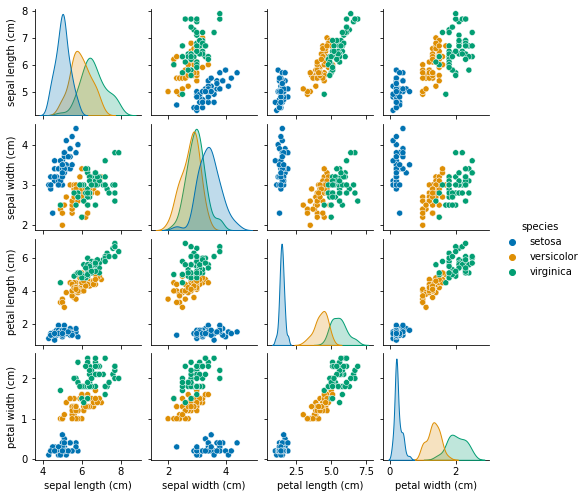

In [2]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

Si se tienen muchas características, podemos aplicar una técnica de **reducción de la dimensión** y visualizar los datos en 2d o 3d.

**Ejemplo:** reducción de imagénes $8\times 8$ de dígitos manuscritos a 2d para examinar cómo se separa cada clase del resto.

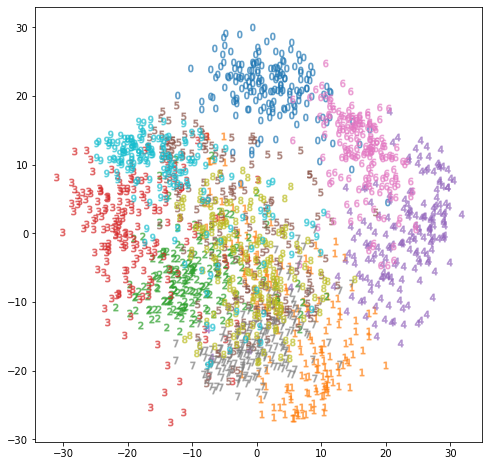

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X2d = PCA(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(8, 8))
colors = cm.tab10(np.linspace(0, 1, 10))
for digit in digits.target_names:
    plt.scatter(*X2d[digits.target == digit].T, marker=f"${digit}$", s=50, alpha=0.5, color=colors[digit])

## Aprendizaje de un clasificador

El aprendizaje de un **clasificador** o **regla de decisión** $f(\boldsymbol{x};\boldsymbol{\theta})$ suele reducirse a escoger un valor para el vector de parámetros $\boldsymbol{\theta}$ que lo gobierna. El efecto último de toda regla de decisión es la partición del espacio de entrada en **regiones de decisión** separadas por **fronteras de decisión.**


**Ejemplo:** regla decisión sencilla para distinguir setosa de no-setosa en iris usando la longitud de pétalo ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa si $x\leq 2.45$}\\
\text{versicolor o virgínica si no}
\end{array}\right.$$
En esta regla tenemos parámetros $\boldsymbol{\theta}=(2.45)$, frontera $x=2.45$, y regiones $\mathcal{R}_{\text{setosa}}=\{x\leq 2.45\}$ y $\mathcal{R}_{\text{no-setosa}}=\{x>2.45\}$.

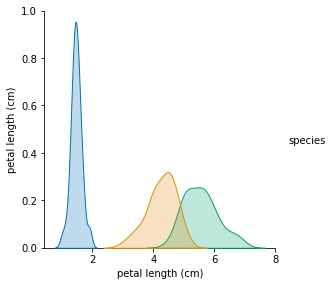

In [4]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 4, palette = 'colorblind');

**Ejemplo (cont.):** refinamiento de la regla anterior mediante particionamiento recursivo de regiones para construir un **árbol de decisión;** aquí solo añadimos una sub-regla para particionar la región no-setosa en versicolor y virgínica según la anchura de pétalo

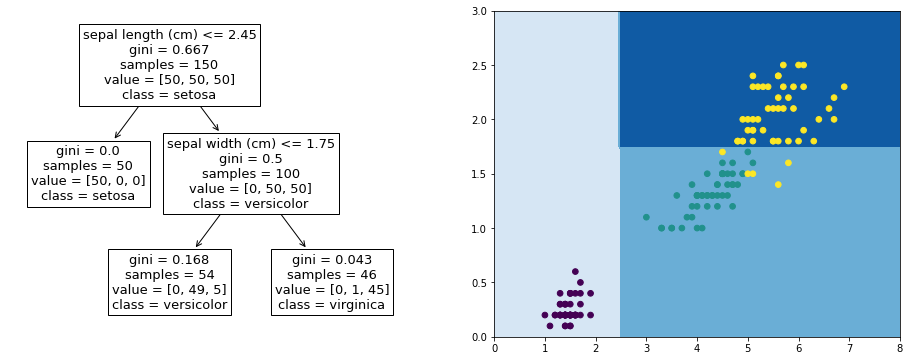

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

## Minimización del riesgo empírico

La medida de rendimiento obvia para aprender el $\boldsymbol{\theta}$ de un clasificador es la **tasa de error (en entrenamiento):**
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\mathbb{I}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$
donde $\mathbb{I}(\cdot)$ es la función indicadora: $\;\mathbb{I}(z)=1$ si el predicado lógico $z$ es cierto; $0$ si es falso.

El **riesgo empírico** generaliza la tasa de error mediante la introducción de una **función de pérdida** $\ell(y,\hat{y})$ para medir la pérdida (coste) producida al clasificar una muestra de la clase $y$ en la clase $\hat{y}$:
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$
La **pérdida 01,** $\ell_{01}(y,\hat{y})=\mathbb{I}(y\neq\hat{y})$, particulariza el riesgo empírico a la tasa de error. Ahora bien, en la práctica se suelen usar funciones de pérdida distintas a la 01, aunque parecidas, para facilitar el aprendizaje. Otro motivo importante para usar pérdidas distintas a la 01 es que errores diferentes tengan costes distintos.

**Ejemplo:** pérdida con costes distintos en iris; suponemos que setosa y versicolor son comestibles, pero virginica no, por lo que confundir una virgínica por una setosa o versicolor tiene mayor coste que cualquier otra confusión
$$\begin{align*}
\ell(y,\hat{y})   && \text{setosa} && \text{versicolor} && \text{virginica}\\\hline%
\text{setosa}     &&             0 &&                 1 &&       1\\%
\text{versicolor} &&             1 &&                 0 &&       1\\%
\text{virginica}  &&            10 &&                10 &&       0\\\hline%
\end{align*}$$


La **minimización del riesgo empírico** es la aproximación básica al **entrenamiento** o **ajuste del modelo:**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{\boldsymbol{\theta}} \frac{1}{N}\sum_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$
Ahora bien, en realidad el verdadero objetivo consiste en minimizar la pérdida esperada sobre datos futuros todavía no vistos, esto es, queremos que el modelo **generalice** bien, no que simplemente funcione bien con los datos de entrenamiento.

## Incertidumbre

En general, resulta imposible aprender clasificadores libres de error a causa de dos fuentes de incertidumbre:
* **Incertidumbre epistémica o de modelo:** falta de conocimiento sobre la transformación entrada-salida
* **Incertidumbre aleatórica o de los datos:** estocasticidad intrínseca e irreducible en la transformación; por ejemplo, datos de clases distintas e idéntico $\boldsymbol{x}$

La aproximación estándar en ML para capturar la incertidumbre subyacente consiste en generalizar la función predictora de manera que, en lugar de predecir una sola clase, prediga una distribución de probabilidad condicional (a posteriori) sobre todas las clases:
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{donde}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$
El aprendizaje de $f$ sujeto a las restricciones usuales de una función de probabilidad suele hacerse con ayuda de la **(función) softmax:**
$$\mathcal{S}:\mathbb{R}^C\to[0,1]^C\qquad\text{definida como}\qquad%
S(\boldsymbol{a})=\frac{1}{\sum_c e^{a_c}}(e^{a_1},\dotsc,e^{a_C})^t$$
donde los **logits** $\boldsymbol{a}$ pueden interpretarse como log-probabilidades no normalizadas que la softmax normaliza para hacer cumplir las restricciones de probabilidad. Así, la función predictora puede ser cualquier función de la entrada que nos convenga, no sujeta a dichas restricciones.

**Regresión logística (multiclase)** es un modelo probabilístico condicional muy popular que usa la softmax con logits calculados como una transformación afín de la entrada:
$$f(\boldsymbol{x}; \mathbf{W}, \boldsymbol{b})=\mathbf{W}^t\boldsymbol{x}+\boldsymbol{b}%
\qquad\text{con}\qquad%
\mathbf{W}=(\boldsymbol{w}_1,\dotsc,\boldsymbol{w}_C)\in\mathbb{R}^{D\times C},\quad\boldsymbol{b}\in\mathbb{R}^C$$
donde, para cada clase $c$, $\boldsymbol{w}_c$ son sus **pesos** o **coeficientes de regresión**, y $b_c$ es su **sesgo** u **ordenada en origen (intercept).** Por simplicidad, se suele usar notación **homogénea** o **compacta** de manera que los sesgos queden absorbidos por la matriz de pesos:
$$f(\tilde{\boldsymbol{x}}; \tilde{\mathbf{W}})=\tilde{\mathbf{W}}^t\tilde{\boldsymbol{x}}%
\qquad\text{con}\qquad%
\tilde{\mathbf{W}}=\begin{pmatrix}\boldsymbol{b}^t\\\mathbf{W}\end{pmatrix}\in\mathbb{R}^{(1+D)\times C}, %
\quad\tilde{\boldsymbol{x}}=(1, \boldsymbol{x})^t\in\mathbb{R}^{1+D}$$



## Estimación por máxima verosimilitud

El ajuste de modelos probabilísticos suele hacerse tomando la **neg-log-probabilidad** como función de pérdida:
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
Nótese que, si el modelo asigna probabilidad uno a la clase correcta, la pérdida es nula; si no, la pérdida será positiva y será tanto mayor cuanto menor sea la probabilidad asignada. Esta función de pérdida se suele llamar **log-pérdida.**

Llamamos **neg-log-verosimilitud (NLL)** al riesgo empírico con log-pérdida:
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

El vector de parámetros que minimiza la NLL se conoce como **estimador máximo-verosímil (MLE):**
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}} \operatorname{NLL}(\boldsymbol{\theta})$$
El MLE se utiliza muy frecuentemente para ajustar modelos a partir de datos de entrenamiento. 

**Ejemplo:** regresión logística aplicada a iris usando la longitud y anchura de pétalos

W= [[ 11.12767979   3.22717485 -14.35485463]
 [ -2.74866104   0.08356447   2.66509657]
 [ -1.16890756  -0.90803047   2.07693804]]


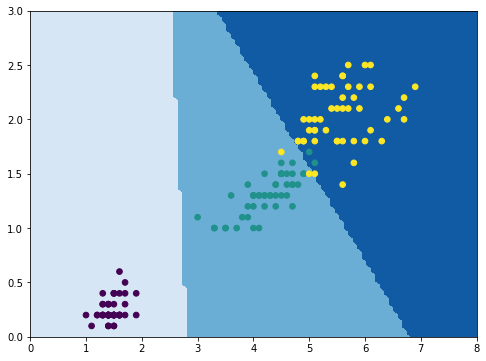

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);